In [202]:
import pandas as pd
import requests 
import numpy as np
import matplotlib.pyplot as plt
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer



In [203]:
twitter_archive = pd.read_csv('twitter-archive-enhanced.csv', sep=',')

url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
r = requests.get(url)
open('image_predictions.tsv', 'wb').write(r.content)
image_predictions = pd.read_csv('image_predictions.tsv', sep = '\t')


In [31]:
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

tweet_ids = twitter_archive.tweet_id.values
len(tweet_ids)
count = 0
fails_dict = {}
start = timer()
with open('tweet_json.txt', 'w') as outfile:
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)


1: 892420643555336193
Fail
2: 892177421306343426
Fail
3: 891815181378084864
Fail
4: 891689557279858688
Fail
5: 891327558926688256
Fail
6: 891087950875897856
Fail
7: 890971913173991426
Fail
8: 890729181411237888
Fail
9: 890609185150312448
Fail
10: 890240255349198849
Fail
11: 890006608113172480
Fail
12: 889880896479866881
Fail
13: 889665388333682689
Fail
14: 889638837579907072
Fail
15: 889531135344209921
Fail
16: 889278841981685760
Fail
17: 888917238123831296
Fail
18: 888804989199671297
Fail
19: 888554962724278272
Fail
20: 888202515573088257
Fail
21: 888078434458587136
Fail
22: 887705289381826560
Fail
23: 887517139158093824
Fail
24: 887473957103951883
Fail
25: 887343217045368832
Fail
26: 887101392804085760
Fail
27: 886983233522544640
Fail
28: 886736880519319552
Fail
29: 886680336477933568
Fail
30: 886366144734445568
Fail
31: 886267009285017600
Fail
32: 886258384151887873
Fail
33: 886054160059072513
Fail
34: 885984800019947520
Fail
35: 885528943205470208
Fail
36: 885518971528720385
Fail
3

KeyboardInterrupt: 

In [204]:
df_list = []

with open('tweet_json', 'r') as file:
    for line in file:
        tweet = json.loads(line)
        tweet_id = tweet['id']
        retweet_count = tweet['retweet_count']
        fav_count = tweet['favorite_count']
        df_list.append({'tweet_id':tweet_id,
                       'retweet_count': retweet_count,
                       'favorite_count': fav_count})
        
tweets_df = pd.DataFrame(df_list)
tweets_df.head()

,favorite_count,retweet_count,tweet_id
0,39467,8853,892420643555336193
1,33819,6514,892177421306343426
2,25461,4328,891815181378084864
3,42908,8964,891689557279858688
4,41048,9774,891327558926688256


- Assessing of twitter_archive

In [205]:
# assestement for twitter_archive
twitter_archive.head()




,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [206]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [207]:
twitter_archive.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [208]:
twitter_archive['timestamp'].dtype


dtype('O')

In [209]:
twitter_archive.duplicated().sum()


0

# cleaning twiter_archive :
- Quality:
 - remove un nedded cols in analysis 
 - remove denominator !=10
 - remove numenator <10
 - rename columns 
 - change timestamp to datetime
- tidiness:
    - Change columns "doggo", "floofer", "pupper", and "puppo" from wide to long format
    - create new col 'rate' insted of (numenator and denominator) 


In [221]:

twitter_archive_clean=twitter_archive.copy()

In [222]:
# delete un needed cols
twitter_archive_clean = twitter_archive_clean.drop(['source',
                                                    'in_reply_to_status_id',
                                                    'in_reply_to_user_id',
                                                    'retweeted_status_id',
                                                    'retweeted_status_user_id', 
                                                    'retweeted_status_timestamp', 
                                                    'expanded_urls'], 1)


In [223]:
#test
twitter_archive_clean.columns

Index(['tweet_id', 'timestamp', 'text', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

In [224]:
twitter_archive_clean.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 10 columns):
tweet_id              2356 non-null int64
timestamp             2356 non-null object
text                  2356 non-null object
rating_numerator      2356 non-null int64
rating_denominator    2356 non-null int64
name                  2356 non-null object
doggo                 2356 non-null object
floofer               2356 non-null object
pupper                2356 non-null object
puppo                 2356 non-null object
dtypes: int64(3), object(7)
memory usage: 184.1+ KB


In [225]:
# remove the denominator !=10 
twitter_archive_clean.drop(twitter_archive_clean[twitter_archive_clean.rating_denominator != 10].index, inplace = True)
#Test
twitter_archive_clean.rating_denominator.value_counts()

10    2333
Name: rating_denominator, dtype: int64

In [226]:
# remove numerator < 10
twitter_archive_clean.drop(twitter_archive_clean[twitter_archive_clean.rating_numerator <= 10].index, inplace = True)
# Test

twitter_archive_clean.rating_numerator.value_counts()

12      558
11      463
13      351
14       54
420       2
75        2
15        2
1776      1
666       1
182       1
27        1
26        1
17        1
Name: rating_numerator, dtype: int64

In [228]:
twitter_archive_clean['rate']=twitter_archive_clean['rating_numerator']/twitter_archive_clean['rating_denominator']
twitter_archive_clean=twitter_archive_clean.drop(['rating_numerator','rating_denominator'],1)
#test

twitter_archive_clean.sample(5)

,tweet_id,timestamp,text,name,doggo,floofer,pupper,puppo,rate
367,828770345708580865,2017-02-07 01:00:22 +0000,This is Alfie. He's your Lyft for tonight. Kin...,Alfie,None,None,None,None,1.3
464,817415592588222464,2017-01-06 17:00:38 +0000,Meet Strudel. He's rather h*ckin pupset that y...,Strudel,None,None,None,None,1.1
355,830956169170665475,2017-02-13 01:46:03 +0000,Say hello to Reggie. He hates puns. 12/10 ligh...,Reggie,None,None,None,None,1.2
437,820078625395449857,2017-01-14 01:22:35 +0000,I've never wanted to go to a camp more in my e...,None,None,None,None,None,1.2
1882,674999807681908736,2015-12-10 17:11:09 +0000,Ok last one of these. I may try to make some m...,None,None,None,None,None,1.3


In [229]:
# cahnge col name
twitter_archive_clean.rename(columns={'timestamp':'tweet_timestamp','name':'dog_name','text':'tweet_text'},inplace=True)
#test
twitter_archive_clean.columns

Index(['tweet_id', 'tweet_timestamp', 'tweet_text', 'dog_name', 'doggo',
       'floofer', 'pupper', 'puppo', 'rate'],
      dtype='object')

In [76]:
#twitter_archive_clean['dog_type']=np.nan

#for t in twitter_archive_clean[['doggo','floofer','pupper','puppo']]:
   # twitter_archive_clean['dog_type'].fillna(twitter_archive_clean[t],inplace=True)

In [230]:
twitter_archive_clean.iloc[:, -4:  ] = twitter_archive_clean.iloc[:, -4:  ].replace('None','')

In [231]:
twitter_archive_clean['dog_type'] = twitter_archive_clean.doggo + twitter_archive_clean.floofer + twitter_archive_clean.pupper + twitter_archive_clean.puppo

In [232]:
# drop un needed cols
twitter_archive_clean.drop(columns=['doggo', 'floofer', 'pupper', 'puppo'], inplace=True)
twitter_archive_clean.loc[twitter_archive_clean.dog_type == "", 'dog_type'] = np.nan
#test
twitter_archive_clean.sample(50)

,tweet_id,tweet_timestamp,tweet_text,dog_name,rate,dog_type
22,887517139158093824,2017-07-19 03:39:09 +0000,I've yet to rate a Venezuelan Hover Wiener. Th...,such,1.4,None
1242,711998809858043904,2016-03-21 19:31:59 +0000,RT @twitter: @dog_rates Awesome Tweet! 12/10. ...,None,1.2,None
657,791774931465953280,2016-10-27 22:53:48 +0000,Vine will be deeply missed. This was by far my...,None,1.4,None
244,846042936437604353,2017-03-26 16:55:29 +0000,Meet Jarvis. The snow pupsets him. Officially ...,Jarvis,1.2,None
1850,675740360753160193,2015-12-12 18:13:51 +0000,Here's a pupper licking in slow motion. 12/10 ...,None,1.2,Nonepupper
2050,671497587707535361,2015-12-01 01:14:35 +0000,This is Pip. He is a ship captain. Many years ...,Pip,1.1,None
258,843604394117681152,2017-03-19 23:25:35 +0000,This is Hank. He's been outside for 3 minutes ...,Hank,1.1,None
673,789628658055020548,2016-10-22 00:45:17 +0000,This is Eli. He can fly. 13/10 magical af http...,Eli,1.3,None
175,857989990357356544,2017-04-28 16:08:49 +0000,This is Rosie. She was just informed of the wa...,Rosie,1.2,None
367,828770345708580865,2017-02-07 01:00:22 +0000,This is Alfie. He's your Lyft for tonight. Kin...,Alfie,1.3,None


In [233]:
#convert tweet_timestamp into datetime 
twitter_archive_clean['tweet_timestamp'] =pd.to_datetime(twitter_archive_clean['tweet_timestamp'])
#test
twitter_archive_clean.head()


,tweet_id,tweet_timestamp,tweet_text,dog_name,rate,dog_type
0,892420643555336193,2017-08-01 16:23:56,This is Phineas. He's a mystical boy. Only eve...,Phineas,1.3,None
1,892177421306343426,2017-08-01 00:17:27,This is Tilly. She's just checking pup on you....,Tilly,1.3,None
2,891815181378084864,2017-07-31 00:18:03,This is Archie. He is a rare Norwegian Pouncin...,Archie,1.2,None
3,891689557279858688,2017-07-30 15:58:51,This is Darla. She commenced a snooze mid meal...,Darla,1.3,None
4,891327558926688256,2017-07-29 16:00:24,This is Franklin. He would like you to stop ca...,Franklin,1.2,None


- Assessing image_predictions

In [234]:
image_predictions.sample(20)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
276,670840546554966016,https://pbs.twimg.com/media/CU9N6upXAAAbtQe.jpg,1,Shih-Tzu,0.963622,True,Lhasa,0.016017,True,guinea_pig,0.007932,False
1252,747963614829678593,https://pbs.twimg.com/media/CmFM7ngXEAEitfh.jpg,1,kelpie,0.307672,True,Irish_terrier,0.197486,True,dingo,0.105475,False
164,668975677807423489,https://pbs.twimg.com/media/CUit1O1WoAEBHjj.jpg,1,basset,0.605437,True,Welsh_springer_spaniel,0.184783,True,Saint_Bernard,0.116299,True
1798,831650051525054464,https://pbs.twimg.com/media/C4qdThOWAAI3WX3.jpg,1,Eskimo_dog,0.530416,True,Siberian_husky,0.180335,True,Norwegian_elkhound,0.104314,True
353,672591271085670400,https://pbs.twimg.com/media/CVWGMQMWUAA7aOM.jpg,1,gondola,0.134290,False,lifeboat,0.108356,False,bassinet,0.093679,False
816,692828166163931137,https://pbs.twimg.com/media/CZ1riVOWwAATfGf.jpg,1,Samoyed,0.985857,True,Arctic_fox,0.007852,False,white_wolf,0.003278,False
1956,864873206498414592,https://pbs.twimg.com/media/DAClmHkXcAA1kSv.jpg,2,pole,0.478616,False,lakeside,0.114182,False,wreck,0.055926,False
431,674271431610523648,https://pbs.twimg.com/media/CVt-SeMWwAAs9HH.jpg,1,German_shepherd,0.991454,True,malinois,0.004150,True,bloodhound,0.003019,True
330,672095186491711488,https://pbs.twimg.com/media/CVPDAR9XIAAm8QB.jpg,1,pug,0.794087,True,French_bulldog,0.140796,True,bull_mastiff,0.044681,True
72,667211855547486208,https://pbs.twimg.com/media/CUJppKJWoAA75NP.jpg,1,golden_retriever,0.462556,True,Labrador_retriever,0.454937,True,kuvasz,0.024193,True


In [235]:
image_predictions.p1_dog.value_counts()



True     1532
False     543
Name: p1_dog, dtype: int64

In [236]:
image_predictions.p2_dog.value_counts()

True     1553
False     522
Name: p2_dog, dtype: int64

In [237]:
image_predictions.p3_dog.value_counts()

True     1499
False     576
Name: p3_dog, dtype: int64

In [238]:
sum(image_predictions['jpg_url'].duplicated())

66

In [239]:
sum(image_predictions_clean['tweet_id'].duplicated())


0

# cleaning image_predictions 
- Quality:
 - delete duplicated rows in jpg_url
 - delete false rows in p1_dogs,p2_dogs,p3_dogs
 - rename cols (p with prediction , p_conf with prediction_conf,p_dog with prediction_dog)
 
- tidiness:
    - img_num useless

In [240]:
image_predictions_clean=image_predictions.copy()



In [241]:
image_predictions_clean.drop(image_predictions_clean[image_predictions_clean.p1_dog == False].index, inplace=True)
image_predictions_clean.p1_dog.value_counts()

True    1532
Name: p1_dog, dtype: int64

In [242]:

image_predictions_clean.drop(image_predictions_clean[image_predictions_clean.p2_dog == False].index, inplace=True)
image_predictions_clean.p2_dog.value_counts()

True    1398
Name: p2_dog, dtype: int64

In [243]:

image_predictions_clean.drop(image_predictions_clean[image_predictions_clean.p3_dog == False].index, inplace=True)
image_predictions_clean.p3_dog.value_counts()

True    1243
Name: p3_dog, dtype: int64

In [244]:
image_predictions_clean['jpg_url'].drop_duplicates(inplace=True)


In [245]:
#test 
image_predictions_clean.jpg_url.duplicated().sum()


0

In [246]:
# rename cols 
image_predictions_clean.rename(columns={'p1':'prediction1','p2':'prediction2','p3':'prediction3'},inplace=True)
image_predictions_clean.rename(columns={'p1_ddog':'prediction1_dog','p2_dog':'prediction2_dog','p3_dog':'prediction3_dog'},inplace=True)
image_predictions_clean.rename(columns={'p1_conf':'prediction1_conf','p2_conf':'prediction2_conf','p3_conf':'prediction3_conf'},inplace=True)
#test
image_predictions_clean.head()

,tweet_id,jpg_url,img_num,prediction1,prediction1_conf,p1_dog,prediction2,prediction2_conf,prediction2_dog,prediction3,prediction3_conf,prediction3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [247]:
image_predictions_clean.drop(['img_num'],axis=1,inplace=True)
image_predictions_clean.head()

,tweet_id,jpg_url,prediction1,prediction1_conf,p1_dog,prediction2,prediction2_conf,prediction2_dog,prediction3,prediction3_conf,prediction3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


- assessing tweets_df

In [248]:
tweets_df.head()

,favorite_count,retweet_count,tweet_id
0,39467,8853,892420643555336193
1,33819,6514,892177421306343426
2,25461,4328,891815181378084864
3,42908,8964,891689557279858688
4,41048,9774,891327558926688256


In [249]:
tweets_df.duplicated().sum()

0

In [250]:
tweets_df.tweet_id.duplicated().sum()

0

In [251]:
tweets_df.tweet_id.dtype

dtype('int64')

# Combining Data

In [252]:
master_df_1 = pd.merge(twitter_archive_clean, image_predictions_clean, on='tweet_id', how='left')

In [253]:
master_df_1.head()

,tweet_id,tweet_timestamp,tweet_text,dog_name,rate,dog_type,jpg_url,prediction1,prediction1_conf,p1_dog,prediction2,prediction2_conf,prediction2_dog,prediction3,prediction3_conf,prediction3_dog
0,892420643555336193,2017-08-01 16:23:56,This is Phineas. He's a mystical boy. Only eve...,Phineas,1.3,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,892177421306343426,2017-08-01 00:17:27,This is Tilly. She's just checking pup on you....,Tilly,1.3,None,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,2017-07-31 00:18:03,This is Archie. He is a rare Norwegian Pouncin...,Archie,1.2,None,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,2017-07-30 15:58:51,This is Darla. She commenced a snooze mid meal...,Darla,1.3,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,891327558926688256,2017-07-29 16:00:24,This is Franklin. He would like you to stop ca...,Franklin,1.2,None,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True


In [254]:
master_df=pd.merge(master_df_1,tweets_df,on='tweet_id',how='left')

In [255]:
master_df.head()

,tweet_id,tweet_timestamp,tweet_text,dog_name,rate,dog_type,jpg_url,prediction1,prediction1_conf,p1_dog,prediction2,prediction2_conf,prediction2_dog,prediction3,prediction3_conf,prediction3_dog,favorite_count,retweet_count
0,892420643555336193,2017-08-01 16:23:56,This is Phineas. He's a mystical boy. Only eve...,Phineas,1.3,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39467.0,8853.0
1,892177421306343426,2017-08-01 00:17:27,This is Tilly. She's just checking pup on you....,Tilly,1.3,None,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,33819.0,6514.0
2,891815181378084864,2017-07-31 00:18:03,This is Archie. He is a rare Norwegian Pouncin...,Archie,1.2,None,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,25461.0,4328.0
3,891689557279858688,2017-07-30 15:58:51,This is Darla. She commenced a snooze mid meal...,Darla,1.3,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42908.0,8964.0
4,891327558926688256,2017-07-29 16:00:24,This is Franklin. He would like you to stop ca...,Franklin,1.2,None,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,41048.0,9774.0


In [256]:
master_df.duplicated().sum

<bound method Series.sum of 0       False
1       False
2       False
3       False
4       False
5       False
6       False
7       False
8       False
9       False
10      False
11      False
12      False
13      False
14      False
15      False
16      False
17      False
18      False
19      False
20      False
21      False
22      False
23      False
24      False
25      False
26      False
27      False
28      False
29      False
        ...  
1408    False
1409    False
1410    False
1411    False
1412    False
1413    False
1414    False
1415    False
1416    False
1417    False
1418    False
1419    False
1420    False
1421    False
1422    False
1423    False
1424    False
1425    False
1426    False
1427    False
1428    False
1429    False
1430    False
1431    False
1432    False
1433    False
1434    False
1435    False
1436    False
1437    False
Length: 1438, dtype: bool>

In [257]:
master_df.to_csv('twitter_archive_master.csv',index=False)

In [258]:
#test
twitter_archive_master=pd.read_csv("twitter_archive_master.csv")
twitter_archive_master.head()

,tweet_id,tweet_timestamp,tweet_text,dog_name,rate,dog_type,jpg_url,prediction1,prediction1_conf,p1_dog,prediction2,prediction2_conf,prediction2_dog,prediction3,prediction3_conf,prediction3_dog,favorite_count,retweet_count
0,892420643555336193,2017-08-01 16:23:56,This is Phineas. He's a mystical boy. Only eve...,Phineas,1.3,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39467.0,8853.0
1,892177421306343426,2017-08-01 00:17:27,This is Tilly. She's just checking pup on you....,Tilly,1.3,None,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,33819.0,6514.0
2,891815181378084864,2017-07-31 00:18:03,This is Archie. He is a rare Norwegian Pouncin...,Archie,1.2,None,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,25461.0,4328.0
3,891689557279858688,2017-07-30 15:58:51,This is Darla. She commenced a snooze mid meal...,Darla,1.3,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42908.0,8964.0
4,891327558926688256,2017-07-29 16:00:24,This is Franklin. He would like you to stop ca...,Franklin,1.2,None,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,41048.0,9774.0


# visualization


In [259]:
twitter_archive_master.dog_type.value_counts()

None            1173
Nonepupper       149
doggo             71
Nonepuppo         25
doggopupper       10
Nonefloofer        8
doggopuppo         1
doggofloofer       1
Name: dog_type, dtype: int64

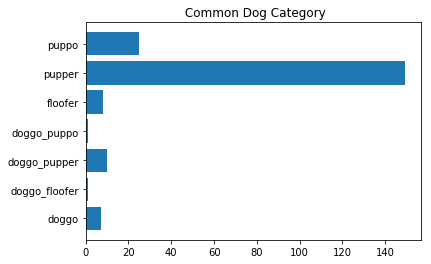

In [277]:

dog_type = ['pupper', 'doggo', 'puppo', 'doggo_pupper', 'floofer','doggo_puppo','doggo_floofer']
dog_counts = [149, 7, 25, 10, 8,1,1]
plt.barh(dog_type,dog_counts)
plt.title(" Common Dog Category")
plt.show()


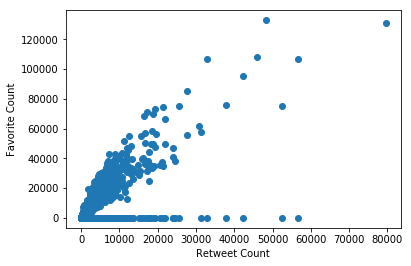

In [261]:
plt.scatter(twitter_archive_master.retweet_count, twitter_archive_master.favorite_count)
plt.xlabel("Retweet Count")
plt.ylabel("Favorite Count")

plt.show()

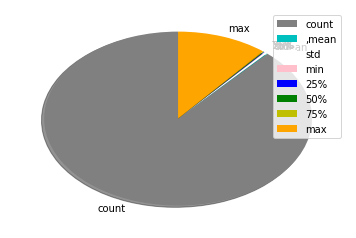

In [309]:
labels=['count',',mean','std','min','25%','50%','75%','max']
mycolors = ["gray", "c",'w','pink','b','g','y','orange']
plt.pie(twitter_archive_clean.rate.describe(),shadow = True,colors=mycolors,labels=labels,startangle = 90)
plt.legend()
plt.show()

In [294]:
twitter_archive_master.rate.describe()

count    1438.000000
mean        1.447983
std         5.210816
min         1.100000
25%         1.100000
50%         1.200000
75%         1.300000
max       177.600000
Name: rate, dtype: float64

# Insights
- The most popular dog type is a "pupper"
- The median and mean of rate between 1.2 and 1.4
- favorite and retweets are highly postive correlated.
